<a href="https://colab.research.google.com/github/cassidyhanna/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

**Average**

In [0]:
amount = np.array([3505,2400,3027,2798,3700,3250,2689])

In [0]:
amount_lenght = len(amount)

In [0]:
amount_sum = sum(amount)

In [5]:
average = amount_sum/amount_lenght 
average

3052.714285714286

**Check**

In [6]:
np.mean(amount)

3052.714285714286

**Variance**

In [7]:
var1 = sum((i - average) ** 2 for i in amount) / amount_lenght 
var1

183761.06122448976

**Check**

In [8]:
np.var(amount)

183761.06122448976

**Standard Deviation**

In [9]:
std = math.sqrt(var1)
std

428.67360686714756

**Check**

In [10]:
np.std(amount)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = np.array([127,80,105,92,120,115,93])

In [0]:
covariance = np.cov(amount, customers)

In [13]:
covariance

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [14]:
customers_average = sum(customers)/amount_lenght
customers_average

104.57142857142857

In [15]:
var2 = sum((i - customers_average) ** 2 for i in customers ) / amount_lenght 
var2

249.3877551020408

In [16]:
customers_std = math.sqrt(var2)
customers_std

15.792015549069118

**Check**

In [17]:
np.var(customers)

249.3877551020408

In [18]:
np.std(customers)

15.792015549069118

**Covariance**

In [19]:
np.corrcoef(customers_std, std)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

In [20]:
np.corrcoef(amount,customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [21]:
np.cov(amount, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

In [0]:
df = pd.read_csv(url)
df = df.drop(columns = 'Unnamed: 0')


In [24]:
df = df.fillna(0)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON",1


In [25]:
df.std()

pclass               0.839913
survived             0.485984
age                 12.878277
sibsp                1.041352
parch                0.865295
fare                51.735460
body                55.177911
has_cabin_number     0.417867
dtype: float64

In [26]:
df.var()

pclass                 0.705453
survived               0.236181
age                  165.850021
sibsp                  1.084413
parch                  0.748735
fare                2676.557808
body                3044.601879
has_cabin_number       0.174613
dtype: float64

In [27]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.705453,-0.126482,-3.951584,0.053924,0.013952,-24.150423,-2.164033,-0.249407
survived,-0.126482,0.236181,-0.314103,-0.013932,0.034861,6.156049,-5.673581,0.061424
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.462982,101.863406,1.463138
sibsp,0.053924,-0.013932,-2.557851,1.084413,0.336722,8.653922,-3.048352,-0.003858
parch,0.013952,0.034861,-1.458263,0.336722,0.748735,9.932434,-1.153653,0.013372
fare,-24.150423,6.156049,113.462982,8.653922,9.932434,2676.557808,-40.679167,10.971645
body,-2.164033,-5.673581,101.863406,-3.048352,-1.153653,-40.679167,3044.601879,0.916147
has_cabin_number,-0.249407,0.061424,1.463138,-0.003858,0.013372,10.971645,0.916147,0.174613


In [28]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.309865,-0.365325,0.061652,0.019197,-0.555779,-0.046694,-0.710617
survived,-0.309865,1.000000,-0.050187,-0.027529,0.082901,0.244845,-0.211578,0.302469
age,-0.365325,-0.050187,1.000000,-0.190730,-0.130862,0.170297,0.143349,0.271887
sibsp,0.061652,-0.027529,-0.190730,1.000000,0.373689,0.160630,-0.053052,-0.008865
parch,0.019197,0.082901,-0.130862,0.373689,1.000000,0.221872,-0.024163,0.036982
fare,-0.555779,0.244845,0.170297,0.160630,0.221872,1.000000,-0.014250,0.507510
body,-0.046694,-0.211578,0.143349,-0.053052,-0.024163,-0.014250,1.000000,0.039734
has_cabin_number,-0.710617,0.302469,0.271887,-0.008865,0.036982,0.507510,0.039734,1.000000


In [29]:
df.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [30]:
float_df = df.select_dtypes(exclude = ['object'])
float_df.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0.0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,0.0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0.0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0.0,1


In [0]:
def variance_covariance(dataframe,column_name):
  variance = np.var(dataframe[column_name])
  covariance = np.cov(dataframe[column_name])
  corr = np.corrcoef(dataframe[column_name])
  
  return (variance,covariance,corr)
 

In [32]:
variance_covariance(df,'age')

(165.72341787151473, array(165.85002094), 1.0)

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

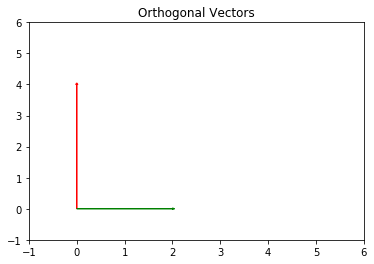

In [33]:
v1 = [0,4]
v2 = [2,0]

plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

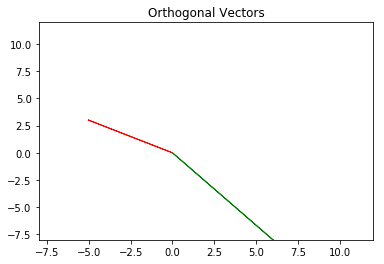

In [34]:
a = [-5,3,7]
b = [6,-8,2]

plt.arrow(0,0, a[0], a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-8,12)          
plt.ylim(-8,12)
plt.title("Orthogonal Vectors")
plt.show()

no,orthogonal vectors should alway have a right angle

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [35]:
c = [2,-15,6,20]
cc = np.multiply(c,c)
t = np.transpose(c)
ct = np.multiply(ct,c)

NameError: ignored

In [0]:
c2 = np.linalg.norm(c)
pow(c2,2)

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4,12,11,9,2]
norm =np.linalg.norm(f)
np.divide(f,norm)


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
vv1 = [2,2,2]
vv2 = [-2,-2,-2]

plt.arrow(0,0, vv1[0], vv1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vv2[0], vv2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.show()

In [0]:
vv1 = [2,2,2]
vv3 = [1,0,3]

plt.arrow(0,0, vv1[0], vv1[1],head_width=.05, head_length=0.05, color ='saddlebrown')
plt.arrow(0,0, vv3[0], vv3[1],head_width=.05, head_length=0.05, color ='teal')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

all vectors whose tip sits on a certain line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

all vedctors of 2D space, l+m+n for some scalars s and t.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



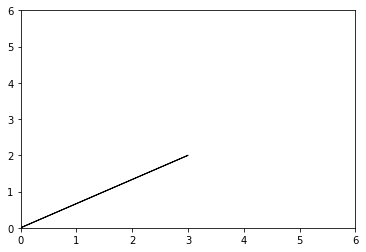

In [41]:
v = [3,2]

plt.arrow(0,0, v[0], v[1])
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

## 6.2 What does it mean to form a basis?

vectors in a vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [55]:
p = np.array([[1,2,3],[-1,0,7],[4,8,2]])
matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

rank of a matrix is the dimension of the vector space generated (or spanned) by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [58]:
v = np.array([1,3]) 
w = np.array([-1,2])
proj = np.dot(v,w)/np.dot(v,v)*v 


diff_vec = w - proj
diff_vec

array([-1.5,  0.5])

In [59]:
np.dot(v, diff_vec)

0.0

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()